In [89]:
import scipy.misc
import numpy as np
from PIL  import Image

In [90]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [92]:
np.random.seed(42)

In [94]:
ary = np.load("hiragana.npz") 

In [95]:
ary['arr_0'].shape

(71, 160, 127, 128)

In [96]:
data = ary['arr_0']

In [18]:
data[0,0,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

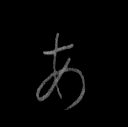

In [13]:
Image.fromarray(data[0,0,:])


In [97]:
firstLetter = data[4,:]

In [15]:
firstLetter.shape

(160, 127, 128)

In [98]:
flattenFl = firstLetter.flatten()

In [99]:
def biColor(X):
    if X>0:
        return 255
    else:
        return 0

In [100]:
toWhite = np.vectorize(biColor)

In [101]:
newFlat = toWhite(flattenFl)

In [102]:
WhiteFL = newFlat.reshape(160,127,128).astype(np.uint8)

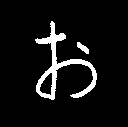

In [103]:
Image.fromarray(WhiteFL[0,:])

In [104]:
firstLetter_ = WhiteFL.reshape(160,16256)

In [189]:
firstLetter_ = firstLetter.reshape(160,16256).astype(np.float)

In [105]:
n_samples, n_features = firstLetter_.shape
n_digits = 40

In [33]:
est = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

est_ = KMeans(init='random', n_clusters=n_digits, n_init=10)


In [34]:
esst = est.fit(firstLetter_)

In [35]:
pred = esst.predict(firstLetter_)

In [48]:
pred

array([1, 5, 4, 2, 4, 3, 6, 2, 5, 6, 9, 5, 5, 5, 2, 0, 8, 1, 5, 8, 0, 9,
       2, 8, 3, 2, 1, 0, 4, 0, 0, 8, 9, 0, 8, 0, 3, 4, 0, 2, 4, 9, 3, 6,
       7, 3, 2, 0, 3, 2, 4, 6, 4, 2, 6, 3, 0, 2, 6, 3, 1, 8, 9, 3, 2, 1,
       6, 1, 5, 9, 1, 6, 5, 3, 9, 5, 4, 0, 9, 4, 9, 1, 5, 1, 2, 1, 2, 3,
       6, 2, 2, 3, 3, 7, 3, 7, 4, 1, 0, 9, 1, 7, 2, 1, 8, 4, 7, 1, 2, 3,
       2, 1, 7, 2, 2, 3, 0, 3, 1, 9, 8, 7, 2, 3, 1, 2, 6, 1, 9, 0, 8, 7,
       0, 5, 3, 4, 1, 8, 0, 0, 7, 2, 5, 5, 6, 0, 8, 6, 5, 2, 6, 5, 9, 8,
       9, 1, 4, 4, 7, 2], dtype=int32)

In [188]:
inic = [i for i,v in enumerate(pred) if v == 2]
len(inic)

13

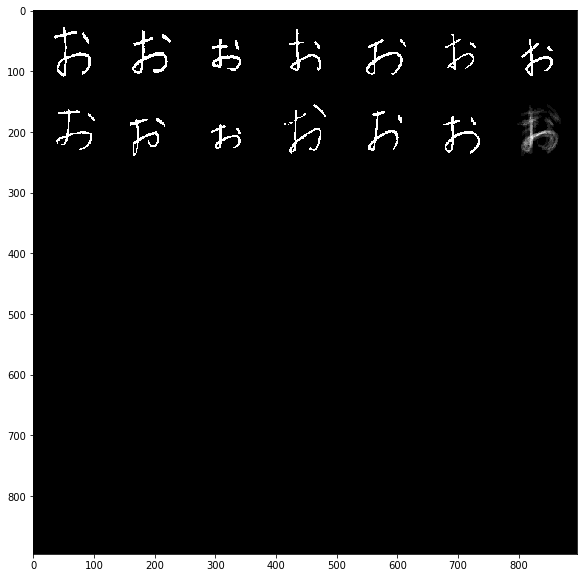

In [189]:
new_img = Image.new('L', (128*7, 128*7))
imgss = [WhiteFL[i] for i in inic]
averagedf = np.average(imgss, axis = 0)
averaged = Image.fromarray(averagedf.astype(np.uint8))

for i,v in enumerate(inic):
    iimg = Image.fromarray(WhiteFL[v,:])
    new_img.paste(iimg, (128*(i%7), 128*(i//7)))
    if (i+1) == len(inic):
        new_img.paste(averaged, (128*((i+1)%7), 128*((i+1)//7)))
        
plt.imshow(new_img)

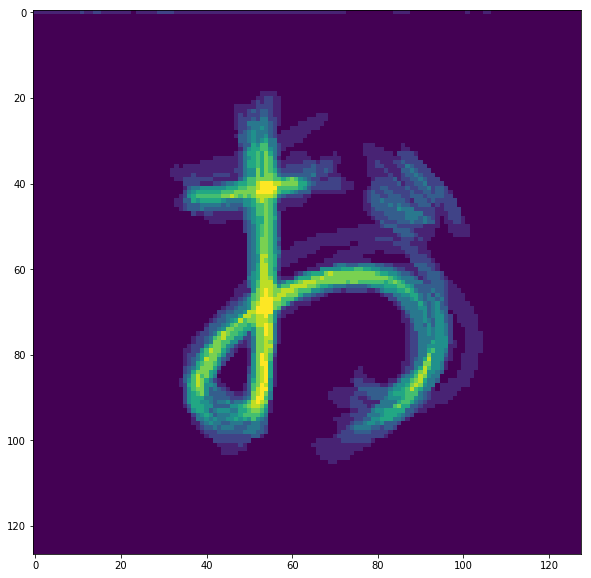

In [187]:
plt.imshow(averagedf)

In [178]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit_transform(firstLetter_)
pcak = KMeans(init='k-means++', n_clusters=(n_digits//4), n_init=5)

print(82 * '_')



__________________________________________________________________________________


In [179]:
pcak.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [180]:
pred = pcak.predict(pca)